In [4]:
# Установка PySpark
!pip install pyspark

# Настройка SparkSession
from pyspark.sql import SparkSession

# Создание объекта SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=b72e844a08f057959ef14b7990a7a99d16c18240e98cdc006f9dea6124fadad6
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [5]:
import pandas as pd
import os

In [6]:
spark = SparkSession.builder\
    .master("local[*]")\
    .appName("SparkFirst")\
    .config("spark.executor.memory", "10g")\
    .config("spark.executor.cores", 5)\
    .config("spark.dynamicAllocation.enabled", "true")\
    .config("spark.dynamicAllocation.maxExecutors", 5)\
    .config("spark.shuffle.service.enabled", "true")\
    .config("spark.master", "local[*]").getOrCreate()

In [8]:
from google.colab import files

# Загрузка файла
uploaded = files.upload()

# Печать загруженных файлов
for filename in uploaded.keys():
    print(f'Файл {filename} был загружен')

Saving yellow_tripdata_2020-01.csv to yellow_tripdata_2020-01.csv
Файл yellow_tripdata_2020-01.csv был загружен


In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, TimestampType, DoubleType, StringType

# Создание объекта SparkSession (если он еще не создан)
spark = SparkSession.builder.master("local[*]").appName("SparkFirst").getOrCreate()

# Определение схемы
schema = StructType([
    StructField('VendorId', IntegerType(), True),
    StructField('tpep_pickup_datetime', TimestampType(), True),
    StructField('tpep_dropoff_datetime', TimestampType(), True),
    StructField('passenger_count', IntegerType(), True),
    StructField('trip_distance', DoubleType(), True),
    StructField('RatecodeID', IntegerType(), True),
    StructField('store_and_fwd_flag', StringType(), True),
    StructField('PULocationID', IntegerType(), True),
    StructField('DOLocationID', IntegerType(), True),
    StructField('payment_type', IntegerType(), True),
    StructField('fare_amount', DoubleType(), True),
    StructField('extra', DoubleType(), True),
    StructField('mta_tax', DoubleType(), True),
    StructField('tip_amount', DoubleType(), True),
    StructField('tolls_amount', DoubleType(), True),
    StructField('improvement_surcharge', DoubleType(), True),
    StructField('total_amount', DoubleType(), True),
    StructField('congestion_surcharge', DoubleType(), True),
])

# Загрузка данных из CSV файла с использованием определенной схемы
df = spark.read.csv('yellow_tripdata_2020-01.csv', header=True, schema=schema)

# Вывод первых нескольких строк датафрейма
df.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorId|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       1| 2020-01-01 00:28:15|  2020-01-01 00:33:03|              1|          1.2|         1|                 N|         238|         239|           1|        6.0|  3.0|    0.5|      1.47|         0.0|                  0.3

In [16]:
df.printSchema()

root
 |-- VendorId: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)



In [18]:
from pyspark.sql.functions import count, when, col

In [19]:
# Подсчет нулевых значений для каждого столбца
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

# Вывод результатов
null_counts.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorId|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|   65441|                   0|                    0|          65441|            0|     65441|             65441|           0|           0|       65441|          0|    0|      0|         0|           0|                    0

In [20]:
df_clean = df.dropna(how='any')

In [21]:
df_clean.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|VendorId|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+
|       0|                   0|                    0|              0|            0|         0|                 0|           0|           0|           0|          0|    0|      0|         0|           0|                    0

In [22]:
df_clean.createOrReplaceTempView('taxi_service_in_process')

In [23]:
sql = """
SELECT *
FROM taxi_service_in_process
WHERE
total_amount > 0 AND
trip_distance > 0
"""

In [24]:
df_done = spark.sql(sql)
df_done.createOrReplaceTempView('taxi_service')

In [25]:
output_path = "pure_data"
df_done.write.csv(output_path, header=True, mode = 'overwrite')
directory = 'pure_data'
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
combined_df = pd.DataFrame()

for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    combined_df = combined_df.append(df, ignore_index=True)

output_csv = 'data_pure.csv'
combined_df.to_csv(output_csv, index=False)

<ipython-input-25-727fb19ebf3f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-25-727fb19ebf3f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-25-727fb19ebf3f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-25-727fb19ebf3f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-25-727fb19ebf3f>:10: FutureWarning: The frame.append method is deprecated and

In [26]:
sql = """
WITH
clear_date_from_table
AS
(
	SELECT date(tpep_pickup_datetime) AS date
	FROM taxi_service ts
),
date_count
AS
(
	SELECT count(date) AS count_date,
	date AS date
	FROM clear_date_from_table
	GROUP BY date
),
info_zero
AS
(
	SELECT max(total_amount) AS zero_max_amm,
	min(total_amount) AS zero_min_amm,
	date(tpep_pickup_datetime) AS date,
	count(passenger_count) AS percentage_zero
	FROM taxi_service ts
	WHERE passenger_count = 0
	GROUP BY date
),
info_1p
AS
(
	SELECT max(total_amount) AS max_amm_1p,
	min(total_amount) AS min_amm_1p,
	date(tpep_pickup_datetime) AS date,
	count(passenger_count) AS percentage_1p
	FROM taxi_service ts
	WHERE passenger_count = 1
	GROUP BY date
),
info_2p
AS
(
	SELECT max(total_amount) AS max_amm_2p,
	min(total_amount) AS min_amm_2p,
	date(tpep_pickup_datetime) AS date,
	count(passenger_count) AS percentage_2p
	FROM taxi_service ts
	WHERE passenger_count = 2
	GROUP BY date
),
info_3p
AS
(
	SELECT max(total_amount) AS max_amm_3p,
	min(total_amount) AS min_amm_3p,
	date(tpep_pickup_datetime) AS date,
	count(passenger_count) AS percentage_3p
	FROM taxi_service ts
	WHERE passenger_count = 3
	GROUP BY date
),
info_4p_plus
AS
(
	SELECT max(total_amount) AS max_amm_4p_plus,
	min(total_amount) AS min_amm_4p_plus,
	date(tpep_pickup_datetime) AS date,
	count(passenger_count) AS percentage_4p_plus
	FROM taxi_service ts
	WHERE passenger_count > 3
	GROUP BY date
)
SELECT date,
COALESCE(round((CAST(percentage_zero AS decimal) / count_date) * 100), 0) AS percentage_zero,
COALESCE(zero_max_amm, 0) AS zero_max_amm,
COALESCE(zero_min_amm, 0) AS zero_min_amm,
COALESCE(round((CAST(percentage_1p AS decimal) / count_date) * 100), 0) AS percentage_1p,
COALESCE(max_amm_1p, 0) AS max_amm_1p,
COALESCE(min_amm_1p, 0) AS min_amm_1p,
COALESCE(round((CAST(percentage_2p AS decimal) / count_date) * 100), 0) AS percentage_2p,
COALESCE(max_amm_2p, 0) AS max_amm_2p,
COALESCE(min_amm_2p, 0) AS min_amm_2p,
COALESCE(round((CAST(percentage_3p AS decimal) / count_date) * 100), 0) AS percentage_3p,
COALESCE(max_amm_3p, 0) AS max_amm_3p,
COALESCE(min_amm_3p, 0) AS min_amm_3p,
COALESCE(round((CAST(percentage_4p_plus AS decimal) / count_date) * 100), 0) AS percentage_4p_plus,
COALESCE(max_amm_4p_plus, 0) AS max_amm_4p_plus,
COALESCE(min_amm_4p_plus, 0) AS min_amm_4p_plus
FROM date_count
LEFT JOIN info_1p USING(date)
LEFT JOIN info_2p USING(date)
LEFT JOIN info_3p USING(date)
LEFT JOIN info_4p_plus USING(date)
LEFT JOIN info_zero USING(date)
"""

In [27]:
df_data_mart = spark.sql(sql)
df_data_mart.createOrReplaceTempView('taxi_service_done')
df_data_mart.show(100)

+----------+---------------+------------+------------+-------------+----------+----------+-------------+----------+----------+-------------+----------+----------+------------------+---------------+---------------+
|      date|percentage_zero|zero_max_amm|zero_min_amm|percentage_1p|max_amm_1p|min_amm_1p|percentage_2p|max_amm_2p|min_amm_2p|percentage_3p|max_amm_3p|min_amm_3p|percentage_4p_plus|max_amm_4p_plus|min_amm_4p_plus|
+----------+---------------+------------+------------+-------------+----------+----------+-------------+----------+----------+-------------+----------+----------+------------------+---------------+---------------+
|2009-01-01|              0|         0.0|         0.0|           79|      74.8|       3.3|            5|      31.3|      31.3|            5|      13.8|      13.8|                11|          61.42|            9.3|
|2020-01-04|              2|      152.54|         0.3|           66|     965.8|       0.3|           18|     481.3|       0.3|            5|    

In [28]:
df_data_mart.write.parquet('data-mart.parquet', mode = 'overwrite')

Дополнительно: также провести аналитику и построить график на тему «Как пройденное расстояние и количество пассажиров влияет на чаевые» в любом удобном инструменте.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install matplotlib seaborn

In [44]:
df_data_mart = pd.read_parquet('data-mart.parquet')
print(df_data_mart.head())

         date percentage_zero  zero_max_amm  zero_min_amm percentage_1p  \
0  2009-01-01               0          0.00           0.0            79   
1  2020-01-04               2        152.54           0.3            66   
2  2008-12-31               0          0.00           0.0            80   
3  2020-01-03               2        187.42           0.3            69   
4  2020-01-07               2        114.80           0.3            74   

   max_amm_1p  min_amm_1p percentage_2p  max_amm_2p  min_amm_2p percentage_3p  \
0       74.80         3.3             5       31.30        31.3             5   
1      965.80         0.3            18      481.30         0.3             5   
2       73.70         7.3             0        0.00         0.0            10   
3     1242.30         0.3            16      370.30         0.3             5   
4      410.67         0.3            14      312.96         3.3             3   

   max_amm_3p  min_amm_3p percentage_4p_plus  max_amm_4p_plus 

In [46]:
# Вывод всех столбцов DataFrame
print(df_data_mart.columns)

Index(['date', 'percentage_zero', 'zero_max_amm', 'zero_min_amm',
       'percentage_1p', 'max_amm_1p', 'min_amm_1p', 'percentage_2p',
       'max_amm_2p', 'min_amm_2p', 'percentage_3p', 'max_amm_3p', 'min_amm_3p',
       'percentage_4p_plus', 'max_amm_4p_plus', 'min_amm_4p_plus'],
      dtype='object')


In [48]:
# Вычисление матрицы корреляций для определенных столбцов
columns_of_interest = ['percentage_zero', 'zero_max_amm', 'zero_min_amm', 'percentage_1p', 'max_amm_1p', 'min_amm_1p', 'percentage_2p', 'max_amm_2p', 'min_amm_2p', 'percentage_3p', 'max_amm_3p', 'min_amm_3p', 'percentage_4p_plus', 'max_amm_4p_plus', 'min_amm_4p_plus']
correlation_matrix = df_data_mart[columns_of_interest].corr()

# Вывод результатов
print(correlation_matrix)

                 zero_max_amm  zero_min_amm  max_amm_1p  min_amm_1p  \
zero_max_amm         1.000000      0.455045    0.478400   -0.617265   
zero_min_amm         0.455045      1.000000    0.094994   -0.346800   
max_amm_1p           0.478400      0.094994    1.000000   -0.365044   
min_amm_1p          -0.617265     -0.346800   -0.365044    1.000000   
max_amm_2p           0.835106      0.432208    0.486414   -0.660283   
min_amm_2p          -0.253983     -0.147091   -0.133195    0.016486   
max_amm_3p           0.685366      0.327902    0.372974   -0.621209   
min_amm_3p          -0.215191     -0.099584   -0.137471   -0.220551   
max_amm_4p_plus      0.660352      0.378596    0.479290   -0.620738   
min_amm_4p_plus     -0.176386     -0.084124   -0.135528    0.018706   

                 max_amm_2p  min_amm_2p  max_amm_3p  min_amm_3p  \
zero_max_amm       0.835106   -0.253983    0.685366   -0.215191   
zero_min_amm       0.432208   -0.147091    0.327902   -0.099584   
max_amm_1p       

<ipython-input-48-0dd6c8210599>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_data_mart[columns_of_interest].corr()


In [49]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

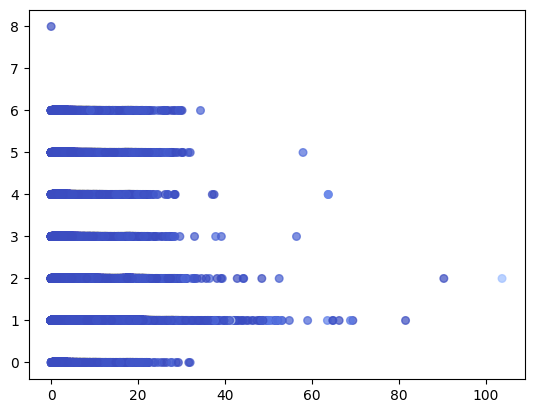

In [50]:
sc = plt.scatter(df['trip_distance'], df['passenger_count'], c=df['tip_amount'], cmap='coolwarm', s=30, alpha=0.7)

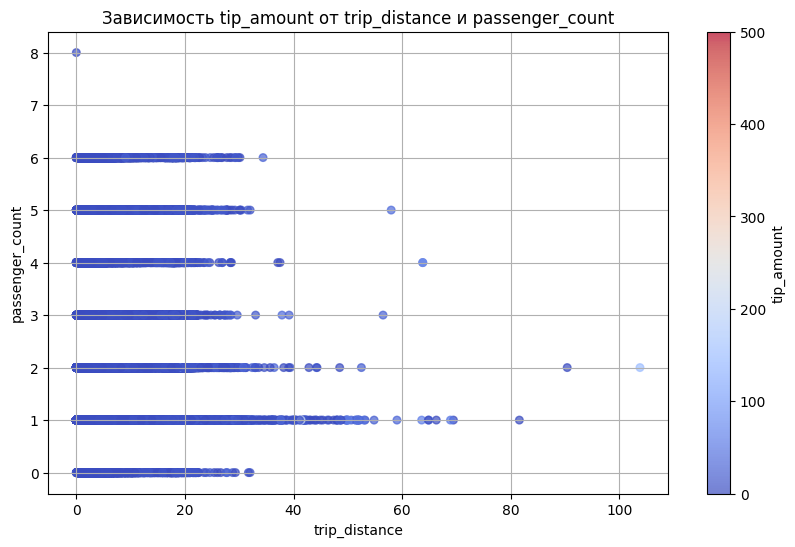

In [52]:
# Создадим график
plt.figure(figsize=(10, 6))

# Используем scatter для отображения зависимости на графике
sc = plt.scatter(df['trip_distance'], df['passenger_count'], c=df['tip_amount'], cmap='coolwarm', s=30, alpha=0.7)

plt.xlabel('trip_distance')
plt.ylabel('passenger_count')
plt.title('Зависимость tip_amount от trip_distance и passenger_count')

# Создаем цветовую шкалу (colorbar) на основе объекта "mappable"
cbar = plt.colorbar(sc, label='tip_amount')

# Добавим сетку
plt.grid(True)

# Сохраним график в формате PNG
plt.savefig('graph.png')

plt.show()